In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
print(df.columns)

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')


In [5]:
df.info()
# Verilerimizin çoğu sayısal olmasına rağmen hepsi birer obje olarak kaydedilmiş.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [6]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]
# Bu komut ile null değerlerin bulunduğu satırları görebiliriz.
# Bu datasette iki bölge için yangın verileri bulunmaktadır.
# Ve bu verileri 122.satır ile ayrılmaktadır. Yani 123'e kadar olanlar başka bölgede, 123'ten sonrası başka bölgededir.
# Biz bu satırları temizleyerek ve bölgeleri sayılarla belirterek data temizliğine başlayalım.

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
df.loc[:123, "Region"] = 0
df.loc[123:, "Region"] = 1
# Burada 123'e kadar olanm bölgeleri 0 diye, ondan sonrakileri 1 diye isimlendirdik.
# Böylece bölgeyle alakalı istatistiksel sonuçları da inceleyebiliriz.

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [10]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [11]:
df[df.isnull().any(axis=1)]
# Artık boş veri olan satırları düzenlemenin vakti, 122 ve 123 tamamen gidecek, 168 hakkında konuşacağız.

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [12]:
df = df.drop(122)
# 122. satırı direkt datasetten çıkarıyoruzç

In [13]:
df[df.isnull().any(axis=1)]
# Bu bu boş satırlardan ilki zaten anlamsız, sadece bölge ismini belirtmek için var.
# Diğer kolonda ise bazı veriler kaymış veya yok. Bu durumda en mantıklısı bu iki satırdan kurtulmak.

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [14]:
df = df.dropna().reset_index(drop=True)
# 123 ve 168. satırdaki verilerde düzenlenemeyeceği için onları da çıkardık.
# Artık boş veri olmayan ve bölge bilgisi bir kolonda duran verimiz var.

In [15]:
df.isnull().sum()
# artık veri setimizde boş veri yok ve daha iyi inceleme yapabiliriz.

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [16]:
df.info()
# Dakat bütün değerlerimiz hala obje şeklinde, bunları encode etmemiz yani sayısal hale getirmemiz gerekiyor.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [17]:
df.loc[121]["Region"]

0.0

In [18]:
df.loc[122]["Region"]

1.0

In [19]:
df.columns
# Bazı kolonların isimlerinde başında veya sonunda boşluklar var. Bunları strip metoduyla kolayca giderebiliriz.

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [20]:
df.columns = df.columns.str.strip()

In [21]:
print(df.columns)
# Gördüğünüz gibi tüm gereksiz boşluklarımız gitti.

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [23]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [24]:
# Bu datasette kolonlarımızı birer sayısal veri olarak kaydetmeyi deneyeceğiz.

In [25]:
#df[["day, month", "year"]] = df[["day", "month", "year"]].astype(int)
# Bu kodumuz hata verdi çünkü datasetimizide int'e çevrilmeye uygun olmayan bir veri varmış.
# Bu hatayı day kolonunda aldığımız için day kolonunu inceleyeceğiz

In [26]:
df["day"].unique()
# Burada day adında değişik bir verimiz var, şimdi o satırı göreceğeğiz ve garipliğin nedenini inceleyeceğiz.

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [27]:
df[df["day"] == "day"]
# Veri setimiz ikiye ayrılmıştı, hatta bu nedenle bazı kolonları silmiştik.
# Bu satırda boş veri gözükmediği için bu satırı atlamışız.
# Bu satırda kolon isimleri yeniden yazılmış ve bizim için hiçbir önemi yok.
# Bu satırı rahatlıkla çıkarabilir ve değerlerimizi sayısal hale getirebiliriz.

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [28]:
df.drop(122, inplace=True)

In [29]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [30]:
print(df.shape)

(243, 15)


In [31]:
df[["day", "month", "year"]] = df[["day", "month", "year"]].astype(int)
df[["Temperature", "RH", "Ws", "Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]] = df[["Temperature", "RH", "Ws", "Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]].astype(float)
# Artık verilerimizi sayısal verilere çevirdik.
# Bundan sonra veri hakkında keşifsel veri analizi ve ML model inşalarını yapabiliriz.

In [32]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(11), int32(3), object(1)
memory usage: 27.5+ KB


In [34]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [35]:
df["Classes"].value_counts()
# Bu kolon aslında tam encode edilmelik bir kolon.
# Fakat bazı küçük yazım yanlışlarından dolayı bazıları farklı sınıf olarak gözüküyor.
# Aslında numpy ile bu soruna güzel bir çzöüm bulabilir ve bu kolonu sayısal hale getirebiliriz.

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [36]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"), 0, 1)
# Bu kodda numpy'ın where metodunu kullanarak datasetimizi kolayca ve pratik şekilde encode ettik.
# Where metoduna bir koşul veririz ve o da bizim için koşulu sağlayan verileri bulur.
# İkinci parametre koşulu saplayan verilerin alacağı değer iken, üçüncü parametre koşulu sağlamayanların alacağı değerdir.

In [37]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [38]:
df["Classes"].value_counts()
# Gördüğünüz gibi hem kolonu sayısal hale getirdik.
# Hem de sadece iki sınıftan ibaret hale getirdik.

Classes
1    137
0    106
Name: count, dtype: int64

In [39]:
df.info()
# Artık boş değerlerimiz yok ve tüm kolonlarımız sayısal.
# Yani yavaştan EDA yapmaya başlayabiliriz.

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int32  
 14  Region       243 non-null    float64
dtypes: float64(11), int32(4)
memory usage: 26.6 KB


In [40]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


In [ ]:
sns.heatmap(df.corr())
plt.show()
# Buradaki day, month ve year kolonları zaman serileriyle çalışmadığımız için kafamızı karıştırabilir.
# Bu nedenle en mantıklısı bu üç kolonu çıkarmak ve öyle devam etmektir.

In [42]:
df.drop(["day", "month", "year"], axis=1, inplace=True)
# Bu kolonları datasetten çıkarıtıyoruz.

In [43]:
df.head()
# Datamızı son haline getirdik.
# Artık yavaştan model oluşturma taraflarına geçebiliriz.

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


# Model Building

In [44]:
from sklearn.model_selection import train_test_split
X = df.drop("FWI", axis=1)
y = df["FWI"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [45]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.644824,-0.322405,-0.222809,0.600615,0.483815,0.362859,0.579809,0.452819,0.463959,0.229479
RH,-0.644824,1.000000,0.205669,0.171031,-0.643767,-0.395535,-0.204568,-0.682107,-0.337032,-0.427947,-0.368402
Ws,-0.322405,0.205669,1.000000,0.152948,-0.135584,0.011874,0.104577,0.021616,0.051452,-0.044791,-0.181246
Rain,-0.222809,0.171031,0.152948,1.000000,-0.475600,-0.263007,-0.282983,-0.325552,-0.276457,-0.363013,0.049735
FFMC,0.600615,-0.643767,-0.135584,-0.475600,1.000000,0.592446,0.483610,0.732549,0.577031,0.770641,0.158505
DMC,0.483815,-0.395535,0.011874,-0.263007,0.592446,1.000000,0.871387,0.658793,0.980646,0.549624,0.153781
DC,0.362859,-0.204568,0.104577,-0.282983,0.483610,0.871387,1.000000,0.467977,0.939248,0.468011,-0.120874
ISI,0.579809,-0.682107,0.021616,-0.325552,0.732549,0.658793,0.467977,1.000000,0.617313,0.714801,0.241664
BUI,0.452819,-0.337032,0.051452,-0.276457,0.577031,0.980646,0.939248,0.617313,1.000000,0.550431,0.044453
Classes,0.463959,-0.427947,-0.044791,-0.363013,0.770641,0.549624,0.468011,0.714801,0.550431,1.000000,0.136752


In [46]:
print(X_train.corr().iloc[1,0])
# Burada ilk verdiğimiz satır, yani kaçıncı satıra bakacağı.
# Diğeri ise kaçıncı kolona bakması gerketiğini belirtir.

-0.6448237350894374


In [47]:
# Eğer giren verilerde kolonlar arasında çok yüksek korelasyon varsa model için sorun oluşturabilir.
# Çünkü model bu iki değişkeni ayırmakta zorlanabilir ve çok değişik ve uçuk katsatyılar verebilir.
# Bu nedenle modelin yorumlanabilirliliği düşük olur ve model genelleme yapamaz.
# Genelleme yapamamasının sebebi modelde overfitting olmasıdır.
# Overfitting olmasının sebebi de modelin katsayıları yüzünden en küçük değişikliğe bile çok büyük tepki vermesidir.
# Yani çok yüksek korelasyonu olan iki kolondan birini çıkarmak model için daha iyi olabilir.

In [48]:
def correlation_for_dropping(df, threshold):
    col_to_drop = set()
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                col_to_drop.add(corr.columns[i])
    return col_to_drop
# Bu kodla beraber yüksek korelasyonlu iki kolondan birini alabiliriz.
# Bu sayede benzer olan iki kolondan birini çıkarabilir ve modelimize öyle verebiliriz.
# Bu kodda önce datamızın korelasyon matrisini hesaplıyoruz.
# Daha sonra korelasyon matrisinin kolon sayısının range'e çevirerek her kolon için bir index elimizde olacak.
# Daha sonra bir for döngüsü daha yazarak kaçıncı kolondaysak o kadarlık bir aralık oluşturuyoruz.
# Daha sonra i ve j değerlerini kullanarak her korelasyon değerini bir kez alıyoruz.
# Böylece tüm korelasyon değerlerini inceliyoruz ve threshold'an büyük olan bir korelaston değeri görürsek onu ayırıyoruz.
# O korelasyon değerinde hangi kolonu inceliyorsak onu çöpe atılacaklar listesine ekliyoruz.
# Böylece benzer kolonlardan birini alabiliyoruz ve böylece bunları modele koymadan önce çıkarabiliyoruz.

In [49]:
cols = correlation_for_dropping(X_train, 0.85)
X_train = X_train.drop(cols, axis=1)
X_test = X_test.drop(cols, axis=1)
# Düşmesi gereken kolonları alıyoruz ve bu kolonları X_train ve X_test verilerimizden çıkararak tamamlıyoruz.

In [50]:
print(X_train.columns)
print(X_test.columns)

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')
Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

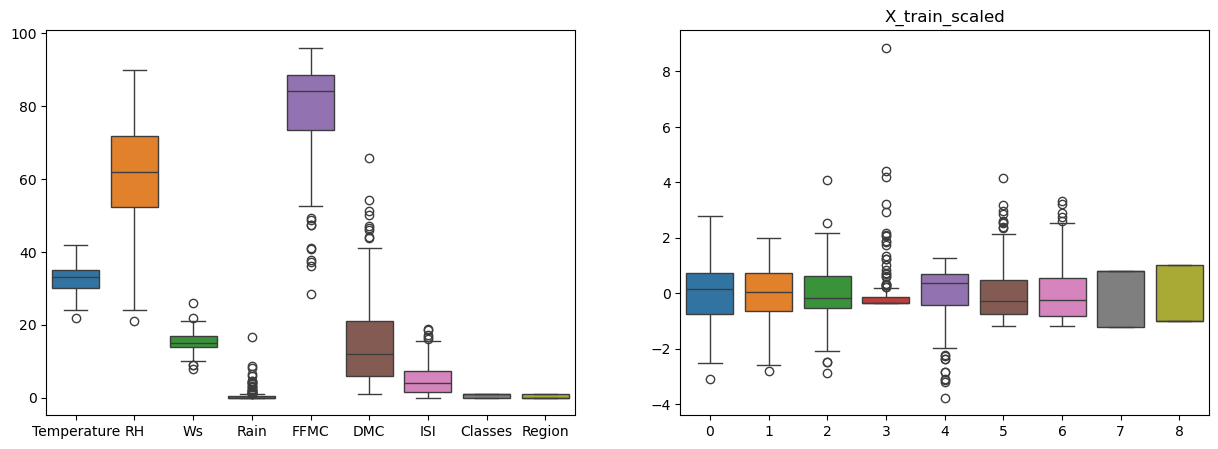

In [58]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(data=X_train, ax=ax[0])
plt.title("X_train")
sns.boxplot(data=X_train_scaled, ax=ax[1])
plt.title("X_train_scaled")
plt.show()
# Gördüğünüz gibi scaler ile standartize edilmemiş datalar çok başka ölçeklerde ve boyutlardadır.
# Fakat Standartize edilmiş datalar neredeyse aynı ölçektedir ve bu da hem modelin hem bizim işimizi kolaylaştırır.

In [65]:
# Regression Comparing

MSE:  0.8764163698605975
MAE:  0.7036011729575915
R2 Score:  0.9838729275348057


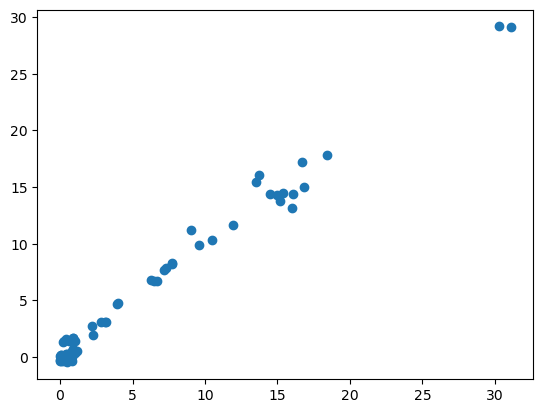

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

MSE:  2.6029377368132205
MAE:  1.2162726338006296
R2 Score:  0.9521029422229386


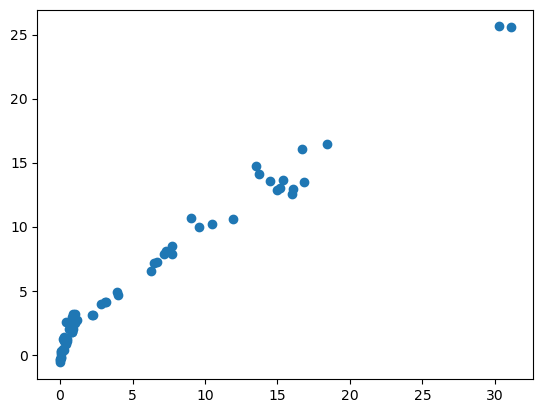

In [62]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

MSE:  0.8868348464263068
MAE:  0.7093542448703309
R2 Score:  0.9836812155445575


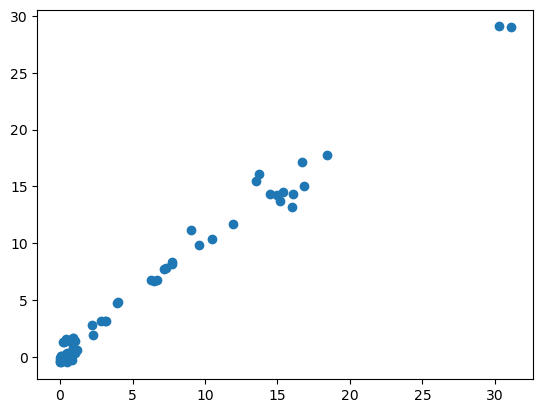

In [63]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

MSE:  5.569160502382822
MAE:  1.7493286471090155
R2 Score:  0.8975210207375393


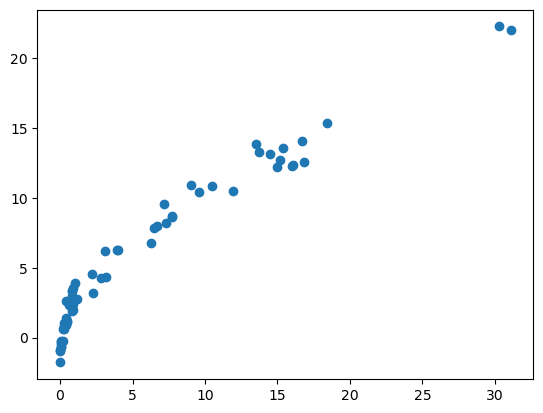

In [64]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

In [66]:
# Datasetimiz üzerinde LinearRegression, Lasso, Ridge, ElasticNet modellerini denedik.
# En iyi sonuçları Linear Regresyonda aldık. Yani şu an en iyi modelimiz Linear Regresyon
# Fakat daha hiç otomatik Cross validation yapmadık.
# Şimdi cross validation nasıl yapılır ve sonuçları etkiler mi onları inceleyelim.

## Lasso Cross Validation

In [67]:
from sklearn.linear_model import LassoCV

MSE:  0.8972011670293638
MAE:  0.722230815630542
Score:  0.9834904632842026


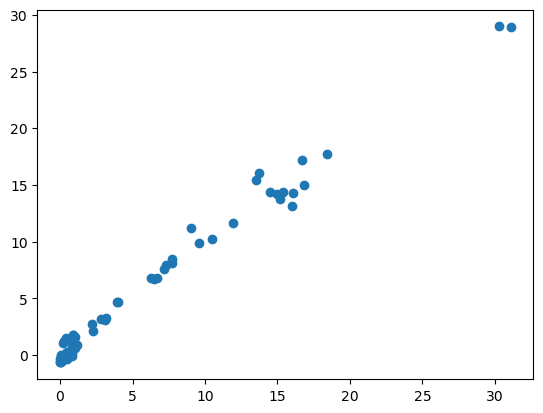

In [69]:
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

In [70]:
print(lassocv.alpha_)
print(lassocv.alphas_)

0.0315484751185951
[6.79691292 6.33882374 5.91160823 5.51318562 5.14161537 4.7950877
 4.47191484 4.17052274 3.88944347 3.627308   3.38283958 3.15484751
 2.94222135 2.74392548 2.55899408 2.38652645 2.22568255 2.075679
 1.93578518 1.80531974 1.68364723 1.57017504 1.4643505  1.36565818
 1.27361739 1.18777984 1.10772745 1.03307033 0.96344485 0.89851189
 0.83795519 0.78147982 0.72881069 0.67969129 0.63388237 0.59116082
 0.55131856 0.51416154 0.47950877 0.44719148 0.41705227 0.38894435
 0.3627308  0.33828396 0.31548475 0.29422213 0.27439255 0.25589941
 0.23865264 0.22256826 0.2075679  0.19357852 0.18053197 0.16836472
 0.1570175  0.14643505 0.13656582 0.12736174 0.11877798 0.11077275
 0.10330703 0.09634448 0.08985119 0.08379552 0.07814798 0.07288107
 0.06796913 0.06338824 0.05911608 0.05513186 0.05141615 0.04795088
 0.04471915 0.04170523 0.03889443 0.03627308 0.0338284  0.03154848
 0.02942221 0.02743925 0.02558994 0.02386526 0.02225683 0.02075679
 0.01935785 0.0180532  0.01683647 0.01570175 0

In [72]:
# Bu kodlarda aynı lasso modelinin sonuna CV eklenmiş olan LassoCV modelini denedik.
# Burada LassoCV sınıfımız bizim için 100 kere (default parametre) en uygun ceza parametresini deniyor ve en uygun olanı seçiyor.
# Biz aynı zamanda burada cross validation işlemine de müdahele edebiliyoruz.
# cv= parametresini kullanarak veri setinin kaç parçaya ayrılacağını belirleyebiliyoruz. Genellikle 5 değeri verilir.
# Bu şekilde cross validaton'a müdahele ederek ve ceza katsayısını optimize ederek (hiperparametre) modelimizi iyileştirebiliyoruz.
# Bunu diğerleri için de deneyebiliriz.

## Ridge Cross Validation

In [73]:
from sklearn.linear_model import RidgeCV

MSE:  0.8868348464263068
MAE:  0.7093542448703309
Score:  0.9836812155445575


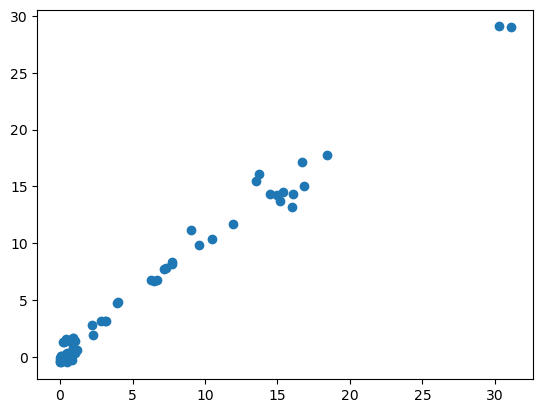

In [74]:
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

In [75]:
# Ridge regresyon modelimizde de Cross validation'a müdahele ederek modelimizin başarısını arttırdık.

## ElasticNet Cross Validaton

In [76]:
from sklearn.linear_model import ElasticNetCV

MSE:  0.9249125778630383
MAE:  0.7354284604918181
Score:  0.9829805413498388


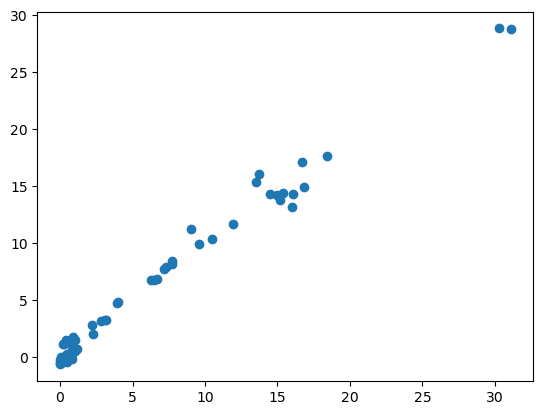

In [77]:
elastic = ElasticNetCV(cv=5)
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

In [78]:
# ELasticNet regresyonda cross validation'a müdahele etmeden önceki başarımız 0.89'du.
# Burada cross validation işlemine müdahele ettik ve model başarısını %98'e kadar çıkardık.
# Yani gerektiği yerlerde bu tarz lamba'lara ve cross validation'a müdahele ederek modelimizi iyileştirebiliriz.